# 第一章 正则表达式

本章内容：
- 简介/动机；
- 特殊符号和字符；
- 正则表达式和python语言
- 一些正则表达式示例
- 更长的正则表达式示例

## 1.1 简介和动机

正则表达式为高级的文本模式匹配、抽取、与/或文本形式的搜索和替换功能提供了基础。
简单地说，正则表达式（简称为 regex）是一些由字符和特殊符号组成的字符串， 它们描述了
模式的重复或者表述多个字符， 于是正则表达式能按照某种模式匹配一系列有相似特征的字
符串

### 核心提示

当严格讨论与字符串中模式相关的正则表达式
时，我们会用术语“**匹配**”（matching），指的是术语“**模式匹配**”（pattern-matching）。在
Python 术语中，主要有两种方法完成模式匹配：“**搜索**”（searching），即在字符串任意部
分中搜索匹配的模式；而“**匹配**”（matching）是指判断一个字符串能否从起始处全部或者
部分地匹配某个模式。搜索通过 **search()**函数或方法来实现，而匹配通过调用 **match()**函数
或方法实现。总之，当涉及模式时，全部使用术语“匹配”；我们按照 Python 如何完成模
式匹配的方式来区分“搜索”和“匹配”。

### 你的第一个正则表达式

正则表达式模式|匹配的字符串
:------|:----
python|python
foo|foo
abc123|abc123

## 1.2 特殊符号和字符

表1.1 常见正则表达式符号和特殊字符

表示法|描述|示例
:-----|:-----|:------
符号|==========================================================================================|====================
literal|匹配文本字符串的字面值 literal|foo
re1/re2|匹配正则表达式 re1 或者 re2|foo/bar
.|匹配任何字符（除了\n 之外）|b.b
^|匹配字符串起始部分|^Dear
\$|匹配字符串终止部分|/bin/\*sh\$
\*|匹配 0 次或者多次前面出现的正则表达式|[A-Za-z0-9]\*
+|匹配 1 次或者多次前面出现的正则表达式|[a-z]+\.com
?|匹配 0 次或者 1 次前面出现的正则表达式|goo?
{N}|匹配 N 次前面出现的正则表达式|[0-9]{3}
{M,N}|匹配 M～N 次前面出现的正则表达式|[0-9]{5,9}
[…]|匹配来自字符集的任意单一字符|[aeiou]
[..x−y..]|匹配 x～y 范围中的任意单一字符|[0-9], [A-Za-z]
[^…]|不匹配此字符集中出现的任何一个字符，包括某一范围的字符（如果在此字符集中出现）|[^aeiou], [^A-Za-z0-9]
(\*/+/?/{})? |用于匹配上面频繁出现/重复出现符号的非贪婪版本|（\*、 +、 ?、 {}） .\*?[a-z]
(…) |匹配封闭的正则表达式，然后另存为子组 |([0-9]{3})?,f(oo/u)bar
特殊字符|==========================================================================================|====================
\d| 匹配任何十进制数字，与[0-9]一致（\D 与\d 相反，不匹配任何非数值型的数字）| data\d+.txt
\w |匹配任何字母数字字符，与[A-Za-z0-9_]相同（\W 与之相反）| [A-Za-z_]\w+
\s| 匹配任何空格字符，与[\n\t\r\v\f]相同（\S 与之相反） |of\sthe
\b |匹配任何单词边界（\B 与之相反） |\bThe\b
\N |匹配已保存的子组 N（参见上面的(…))| price: \16
\c| 逐字匹配任何特殊字符 c（即，仅按照字面意义匹配，不匹配特殊含义）| \., \\, \*
\A(\Z) |匹配字符串的起始（结束）（另见上面介绍的^和$）| \ADear
扩展表示法|==========================================================================================|====================
(?iLmsux)| 在正则表达式中嵌入一个或者多个特殊“标记” 参数（或者通过函数/方法）| （?x），（？ im）
(?:…) |表示一个匹配不用保存的分组 |(?:\w+\.)*
(?P<name>…) |像一个仅由 name 标识而不是数字 ID 标识的正则分组匹配 |(?P<data>)
(?P=name) |在同一字符串中匹配由(?P<name)分组的之前文本 |(?P=data)
(?#…)| 表示注释，所有内容都被忽略 |(?#comment)
(?=…) |匹配条件是如果…出现在之后的位置，而不使用输入字符串；称作正向前视断言 |(?=.com)
(?!…) |匹配条件是如果…不出现在之后的位置，而不使用输入字符串；称作负向前视断言| (?!.net)
(?<=…) |匹配条件是如果…出现在之前的位置，而不使用输入字符串；称作正向后视断言| (?<=800-)
(?<!…) |匹配条件是如果…不出现在之前的位置，而不使用输入字符串；称作负向后视断言| (?<!192\.168\.)
(?(id/name)Y/N )|如果分组所提供的 id 或者 name（名称）存在，就返回正则表达式的条件匹配 Y，如果不存在，就返回 N； /N 是可选项|(?(1)y/x)

上述用  /   代替  |  ，只有最后一行   id/name 不是

### 1.2.1 使用择一匹配符号匹配多个正则表达式模式

表示择一匹配的管道符号（|），也就是键盘上的竖线，表示一个“从多个模式中选择其
一”的操作。它用于分割不同的正则表达式。（这里我们用/代替）

正则表达式模式|匹配的字符串
:----|:------
at / home| at,home
r2d2 / c3po|r2d2,c3po
bat / bet / bit|bat , bet , bit

### 1.2.2 匹配任意单个字符

点号或者句点（.） 符号匹配除了换行符\n 以外的任何字符（Python 正则表达式有一个编译标记[S 或者 DOTALL]，该标记能够推翻这个限制，使点号能够匹配换行符）。

正则表达式模式|匹配的字符串
:----|:------
f.o| 匹配在字母“f”和“o”之间的任意一个字符；例如 fao、 f9o、 f#o 等
..|任意两个字符
.end|匹配在字符串 end 之前的任意一个字符

要显式匹配一个句点符号本身，必须使用反斜线转义句点符号的功能，例如“\.”。

### 1.2.3 从字符串起始或者结尾或者单词边界匹配

正则表达式模式|匹配的字符串
:----|:------
   ^From | 任何以 From 作为起始的字符串  
  /bin/tcsh\$   | 任何以/bin/tcsh 作为结尾的字符
  ^Subject: hi\$  |任何由单独的字符串 Subject: hi 构成的字符串

特殊字符\b 和\B 可以用来匹配字符边界。而两者的区别在于\b 将用于匹配一个单词的边
界，这意味着如果一个模式必须位于单词的起始部分，就不管该单词前面（单词位于字符串
中间）是否有任何字符（单词位于行首）。同样， \B 将匹配出现在一个单词中间的模式（即，
不是单词边界）。

正则表达式模式|匹配的字符串
:----|:------
   the  |  任何包含 the 的字符串
  \bthe   | 任何以 the 开始的字符串
   \bthe\b  |仅仅匹配单词 the
   \Bthe |任何包含但并不以 the 作为起始的字符串

### 1.2.4 创建字符集

正则表达式模式|匹配的字符串
:----|:------
b[aeiu]t |bat、 bet、 bit、 but
[cr][23][dp][o2] |一个包含四个字符的字符串，第一个字符是“c”或“r”，然后是“2”或“3”，后面是“d”或“p”，最后要么是“o”要么是“2”。例如， c2do、 r3p2、 r2d2、 c3po 等

### 1.2.5 限定范围和否定

正则表达式模式|匹配的字符串
:----|:------
z.[0-9] |字母“z”后面跟着任何一个字符，然后跟着一个数字
[r-u][env-y][us] |字母“r”、“s”、“t”或者“u”后面跟着“e”、“n”、“v”、“w”、“x”或者“y”，然后跟着“u”或者“s”
[^aeiou]| 一个非元音字符（练习：为什么我们说“非元音”而不是“辅音”？）
[^\t\n] |不匹配制表符或者\n
[“-a]| 在一个 ASCII 系统中，所有字符都位于“”和“a”之间，即 34~97 之间

### 1.2.6 使用闭包操作符实现存在性和频数匹配

星号或者星号操作符（*）将匹配其左边的正则表达式
出现零次或者多次的情况（在计算机编程语言和编译原理中，该操作称为 Kleene 闭包）。加
号（+）操作符将匹配一次或者多次出现的正则表达式（也叫做正闭包操作符），问号（？）
操作符将匹配零次或者一次出现的正则表达式。
还有大括号操作符（{}），里面或者是单个值或者是一对由逗号分隔的值。这将最终精
确地匹配前面的正则表达式 N 次（如果是{N}）或者一定范围的次数

当模式匹配使用分组操作符时，正则表达式引擎将试图
“吸收”匹配该模式的尽可能多的字符。这通常被叫做贪婪匹配。问号要求正则表达式引擎去
“偷懒”，如果可能，就在当前的正则表达式中尽可能少地匹配字符，留下尽可能多的字符给
后面的模式（如果存在）。

正则表达式模式|匹配的字符串
:----|:------
[dn]ot? |字母“d”或者“n”，后面跟着一个“o”，然后是最多一个“t”，例如， do、 no、 dot、 not
0?[1-9] |任何数值数字， 它可能前置一个“0”，例如， 匹配一系列数（表示从 1～9 月的数值），不管是一个还是两个数字
[0-9]{15,16}| 匹配 15 或者 16 个数字（例如信用卡号码）
</?[^>]+> |匹配全部有效的（和无效的） HTML 标签
[KQRBNP][a-h][1-8]-[a-h][1-8] |在“长代数”标记法中，表示国际象棋合法的棋盘移动（仅移动，不包括吃子和将军）即“K”、“Q”、“R”、“B”、“N”或“P”等字母后面加上“a1”～“h8”之间的棋盘坐标。前面的坐标表示从哪里开始走棋，后面的坐标代表走到哪个位置（棋格）上

### 1.2.7 表示字符集的特殊字符

正则表达式模式|匹配的字符串
:----|:------
\w+-\d+| 一个由字母数字组成的字符串和一串由一个连字符分隔的数字
[A-Za-z]\w* |第一个字符是字母；其余字符（如果存在）可以是字母或者数字（几乎等价于 Python 中的有效标识符［参见练习］）
\d{3}-\d{3}-\d{4} |美国电话号码的格式，前面是区号前缀，例如 800-555-1212
\w+@\w+\.com |以 XXX@YYY.com 格式表示的简单电子邮件地址

### 1.2.8 使用圆括号指定分组

当使用正则表达式时，一对圆括号可以实现以下任意一个（或者两个）功能：
- 对正则表达式进行分组；
- 匹配子组。

关于为何想要对正则表达式进行分组的一个很好的示例是：当有两个不同的正则表达式
而且想用它们来比较同一个字符串时。另一个原因是对正则表达式进行分组可以在整个正则
表达式中使用重复操作符（而不是一个单独的字符或者字符集）。

使用圆括号进行分组的一个副作用就是，匹配模式的子字符串可以保存起来供后续使用。
这些子组能够被同一次的匹配或者搜索重复调用，或者提取出来用于后续处理。

正则表达式模式|匹配的字符串
:----|:------
\d+(\.\d*)? |表示简单浮点数的字符串；也就是说，任何十进制数字，后面可以接一个小数点和零个或者多个十进制数字，例如“0.004”、“2”、“75.”等
(Mr?s?\.)?[A-Z][a-z]*[A-Za-z-]+ |名字和姓氏，以及对名字的限制（如果有，首字母必须大写，后续字母小写），全名前可以有可选的“Mr.”、“Mrs.”、“Ms.”或者“M.”作为称谓，以及灵活可选的姓氏，可以有多个单词、 横线以及大写字母

### 1.2.9 扩展表示法

正则表达式模式|匹配的字符串
:----|:------
(?:\w+\.)* |以句点作为结尾的字符串供后续的使用和数据检索
(?#comment) |此处并不做匹配，只是作为注释
(?=.com) |如果一个字符串后面跟着“.com”才做匹配操作，并不使用任何目标字符串
(?!.net) |如果一个字符串后面不是跟着“.net”才做匹配操作
(?<=800-) |如果字符串之前为“800-”才做匹配，假定为电话号码， 同样，并不使用任何输入字符串
(?<!192\.168\.) |如果一个字符串之前不是“192.168.”才做匹配操作，假定用于过滤掉一组 C 类 IP 地址
(?(1)y、x) |如果一个匹配组 1（\1）存在， 就与 y 匹配； 否则， 就与 x 匹配

## 1.3 正则表达式和 Python 语言

### 1.3.1 re 模块：核心函数和方法

表 1-2 常见的正则表达式属性

函数/方法|描述
:----|:------
仅仅是 re 模块函数|
compile(pattern， flags = 0) |使用任何可选的标记来编译正则表达式的模式，然后返回一个正则表达式对象
re 模块函数和正则表达式对象的方法|
match(pattern， string， flags=0)| 尝试使用带有可选的标记的正则表达式的模式来匹配字符串。如果匹配成功，就返回匹配对象； 如果失败，就返回 None
search(pattern， string， flags=0) |使用可选标记搜索字符串中第一次出现的正则表达式模式。 如果匹配成功，则返回匹配对象； 如果失败，则返回 None
findall(pattern， string [, flags] ) |查找字符串中所有（非重复）出现的正则表达式模式，并返回一个匹配列表
finditer(pattern， string [, flags] )| 与 findall()函数相同，但返回的不是一个列表，而是一个迭代器。 对于每一次匹配，迭代器都返回一个匹配对象
split(pattern， string， max=0)| 根据正则表达式的模式分隔符， split 函数将字符串分割为列表，然后返回成功匹配的列表，分隔最多操作 max 次（默认分割所有匹配成功的位置）
re 模块函数和正则表达式对象方法|
sub(pattern， repl， string， count=0) |使用 repl 替换所有正则表达式的模式在字符串中出现的位置，除非定义 count， 否则就将替换所有出现的位置（另见 subn()函数，该函数返回替换操作的数目）
purge() |清除隐式编译的正则表达式模式
常用的匹配对象方法（查看文档以获取更多信息）|
group(num=0) |返回整个匹配对象，或者编号为 num 的特定子组
groups(default=None)| 返回一个包含所有匹配子组的元组（如果没有成功匹配，则返回一个空元组）
groupdict(default=None) |返回一个包含所有匹配的命名子组的字典，所有的子组名称作为字典的键（如果没有成功匹配，则返回一个空字典）
常用的模块属性（用于大多数正则表达式函数的标记）|
re.I、 re.IGNORECASE| 不区分大小写的匹配
re.L、 re.LOCALE| 根据所使用的本地语言环境通过\w、 \W、 \b、 \B、 \s、 \S 实现匹配
re.M、 re.MULTILINE |^和$分别匹配目标字符串中行的起始和结尾，而不是严格匹配整个字符串本身的起始和结尾
re.S、 rer.DOTALL| “.”（点号）通常匹配除了\n（换行符）之外的所有单个字符；该标记表示“.”（点号）能够匹配全部字符
re.X、 re.VERBOSE |通过反斜线转义， 否则所有空格加上#（以及在该行中所有后续文字）都被忽略，除非在一个字符类中或者允许注释并且提高可读性

### 1.3.2 使用 compile()函数编译正则表达式

### 1.3.3 匹配对象以及 group()和 groups()方法

group()要么返回整个匹配对象，要么根据要求返回特定子组。 groups()则仅返回一个包含
唯一或者全部子组的**元组**。如果没有子组的要求，那么当group()仍然返回整个匹配时，groups()
返回一个空元组。

### 1.3.4 使用 match()方法匹配字符串|

match()是将要介绍的第一个 re 模块函数和正则表达式对象（regex object）方法。 match()
函数试图从字符串的起始部分对模式进行匹配。如果匹配成功，就返回一个匹配对象； 如果
匹配失败，就返回 None，匹配对象的 group()方法能够用于显示那个成功的匹配。

In [1]:
import re

m=re.match('foo','foo')
if m is not None:
    print(m.group())

foo


In [5]:
m.group()

'foo'

In [6]:
m=re.match('foo','bar')
if m is not None:
    print(m.group())

In [4]:
print(m)

None


In [5]:
m=re.match('foo','food on the table')
m.group()

'foo'

In [6]:
re.match('foo','food on the table').group()

'foo'

### 1.3.5 使用 search()在一个字符串中查找模式（搜索与匹配的对比）

search()的工作方式与 match()完全一致，不
同之处在于 search()会用它的字符串参数，在任意位置对给定正则表达式模式搜索第一次出现
的匹配情况。如果搜索到成功的匹配，就会返回一个匹配对象； 否则， 返回 None。

In [8]:
m=re.search('foo','seafood')
if m is not None:
    print(m.group())

foo


In [8]:
m

<_sre.SRE_Match object; span=(3, 6), match='foo'>

### 1.3.6 匹配多个字符串

In [10]:
bt='bat|bit|bet'
m=re.match(bt,'bat')
m.group()

'bat'

In [11]:
m=re.match(bt,'blt')
if m is not None:
    print(m.group())
else:
    print(m)

None


In [12]:
m = re.match(bt, 'He bit me!') # 不能匹配字符串
if m is not None: 
    print(m.group())
else:
    print(m)

None


In [15]:
m = re.search(bt, 'He bit me!') # 通过搜索查找 'bit'
if m is not None: 
    print(m.group())
else:
    print(m)

bit


### 1.3.7 匹配任何单个字符

In [17]:
anyend = '.end'
m = re.match(anyend, 'bend') # 点号匹配 'b'
if m is not None:print( m.group())

bend


In [18]:
m = re.match(anyend, 'end') # 不匹配任何字符
if m is not None:
    print(m.group())
else:
    print(m)

None


In [19]:
m = re.match(anyend, '\nend') # 除了 \n 之外的任何字符
if m is not None:
    print(m.group())
else:
    print(m)    

None


In [20]:
m = re.search('.end', 'The end.')# 在搜索中匹配 ' '
if m is not None: 
    print(m.group())

 end


In [20]:
patt314 = '3.14' # 表示正则表达式的点号
pi_patt = '3\.14' # 表示字面量的点号 (dec. point)
m = re.match(pi_patt, '3.14') # 精确匹配
if m is not None: print(m.group())

3.14


In [21]:
m = re.match(patt314, '3014') # 点号匹配'0'
if m is not None: print(m.group())

3014


In [22]:
m = re.match(patt314, '3.14') # 点号匹配 '.'
if m is not None: print(m.group())

3.14


### 1.3.8 创建字符集（[ ]）

In [23]:
m = re.match('[cr][23][dp][o2]', 'c3po')# 匹配 'c3po'
if m is not None: print(m.group())

c3po


In [24]:
m = re.match('[cr][23][dp][o2]', 'c2do')# 匹配 'c2do'
if m is not None: print(m.group())

c2do


In [21]:
m = re.match('r2d2|c3po', 'c2do')# 不匹配 'c2do'
if m is not None: 
    print(m.group())
else:
    print(m)

None


In [27]:
m = re.match('r2d2|c3po', 'r2d2')# 匹配 'r2d2'
if m is not None: print(m.group())

r2d2


### 1.3.9 重复、特殊字符以及分组

In [28]:
patt = '\w+@(\w+\.)?\w+\.com'
re.match(patt, 'nobody@xxx.com').group()

'nobody@xxx.com'

In [29]:
re.match(patt, 'nobody@www.xxx.com').group()

'nobody@www.xxx.com'

In [30]:
patt='\w+@(\w+\.)*\w+\.com'
re.match(patt,'nobody@www.xxx.yyy.zzz.com').group()

'nobody@www.xxx.yyy.zzz.com'

In [31]:
m = re.match('\w\w\w-\d\d\d', 'abc-123')
if m is not None: print(m.group())

abc-123


In [22]:
m = re.match('\w\w\w-\d\d\d', 'abc-xyz')
if m is not None:
    print(m.group())
else:
    print(m)

None


In [34]:
m=re.match('(\w\w\w)-(\d\d\d)','abc-123')

In [35]:
m.group()

'abc-123'

In [36]:
m.group(1)

'abc'

In [37]:
m.group(2)

'123'

In [38]:
m.groups()

('abc', '123')

group()通常用于以普通方式显示所有的匹配部分，但也能用于获
取各个匹配的子组。可以使用 groups()方法来获取一个包含所有匹配子字符串的元组。

In [39]:
m = re.match('ab', 'ab') # 没有子组
m.group()

'ab'

In [40]:
m.groups()

()

In [41]:
m = re.match('(ab)', 'ab') # 一个子组
m.group()

'ab'

In [42]:
m.group(1)

'ab'

In [43]:
m.groups()

('ab',)

In [44]:
m = re.match('(a)(b)', 'ab') # 两个子组
m.group()

'ab'

In [45]:
m.group(1)

'a'

In [46]:
m.group(2)

'b'

In [47]:
m.groups()

('a', 'b')

In [48]:
m = re.match('(a(b))', 'ab') # 两个子组
m.group()

'ab'

In [49]:
m.group(1)

'ab'

In [50]:
m.group(2)

'b'

In [51]:
m.groups()

('ab', 'b')

### 1.3.10 匹配字符串的起始和结尾以及单词边界

In [52]:
m = re.search('^The', 'The end.') # 匹配
if m is not None: print(m.group())

The


In [23]:
m = re.search('^The', 'end. The') # 不作为起始
if m is not None:
    print(m.group())
else:
    print(m)

None


In [55]:
m = re.search(r'\bthe', 'bite the dog') # 在边界
if m is not None: print(m.group())

the


In [24]:
m = re.search(r'\bthe', 'bitethe dog') # 有边界
if m is not None:
    print(m.group())
else:
    print(m)

None


In [58]:
m = re.search(r'\Bthe', 'bitethe dog') # 没有边界
if m is not None: print(m.group())

the


### 1.3.11 使用 findall()和 finditer()查找每一次出现的位置

findall()查询字符串中某个正则表达式模式全部的非重复出现情况。这与 search()在执行
字符串搜索时类似，但与 match()和 search()的不同之处在于， findall()总是返回一个**列表**。如
果 findall()没有找到匹配的部分，就返回一个空列表，但如果匹配成功，列表将包含所有成
功的匹配部分（从左向右按出现顺序排列）。

In [59]:
re.findall('car', 'car')

['car']

In [60]:
re.findall('car', 'scary')

['car']

In [61]:
re.findall('car', 'carry the barcardi to the car')

['car', 'car', 'car']

组在一个更复杂的返回列表中搜索结果，而且这样做是有意义的，因为子组是允许从
单个正则表达式中抽取特定模式的一种机制

对于一个成功的匹配，每个子组匹配是由 findall()返回的结果列表中的单一元素；对于
多个成功的匹配，每个子组匹配是返回的一个元组中的单一元素，而且每个元组（每个元组
都对应一个成功的匹配）是结果列表中的元素。

finditer()函数是在 Python 2.2 版本中添加回来的，这是一个与 findall()函数类似但是更节
省内存的变体。两者之间以及和其他变体函数之间的差异（很明显不同于返回的是一个迭代
器还是列表）在于，和返回的匹配字符串相比， finditer()在匹配对象中迭代。

In [62]:
s = 'This and that.'
re.findall(r'(th\w+) and (th\w+)', s, re.I)

[('This', 'that')]

In [63]:
for g in re.finditer(r'(th\w+) and (th\w+)', s,re.I):
    print(g.groups())

('This', 'that')


In [64]:
for g in re.finditer(r'(th\w+) and (th\w+)', s,re.I):
    print(g.group(1))

This


In [65]:
for g in re.finditer(r'(th\w+) and (th\w+)', s,re.I):
    print(g.group(2))

that


In [66]:
[g.groups() for g in re.finditer(r'(th\w+) and (th\w+)',s, re.I)]

[('This', 'that')]

In [67]:
re.findall(r'(th\w+)', s, re.I)

['This', 'that']

In [68]:
it = re.finditer(r'(th\w+)', s, re.I)
for g in it:
    print(g.group())

This
that


In [69]:
it = re.finditer(r'(th\w+)', s, re.I)
for g in it:
    print(g.group(1))

This
that


In [70]:
it = re.finditer(r'(th\w+)', s, re.I)
for g in it:
    print(g.groups())

('This',)
('that',)


注意，使用 finditer()函数完成的所有额外工作都旨在获取它的输出来匹配 findall()的输出。

### 1.3.12 使用 sub()和 subn()搜索与替换

有两个函数/方法用于实现搜索和替换功能： sub()和 subn()。两者几乎一样，都是将某字
符串中所有匹配正则表达式的部分进行某种形式的替换。用来替换的部分通常是一个字符串，
但它也可能是一个函数，该函数返回一个用来替换的字符串。 subn()和 sub()一样，但 subn()
还返回一个表示替换的总数，替换后的字符串和表示替换总数的数字一起作为一个拥有两个
元素的元组返回。

In [71]:
re.sub('X', 'Mr. Smith', 'attn: X\n\nDear X,\n')

'attn: Mr. Smith\n\nDear Mr. Smith,\n'

In [72]:
re.subn('X', 'Mr. Smith', 'attn: X\n\nDear X,\n')

('attn: Mr. Smith\n\nDear Mr. Smith,\n', 2)

In [73]:
print (re.sub('X', 'Mr. Smith', 'attn: X\n\nDear X,\n'))

attn: Mr. Smith

Dear Mr. Smith,



In [74]:
re.sub('[ae]', 'X', 'abcdef')

'XbcdXf'

In [75]:
re.subn('[ae]', 'X', 'abcdef')

('XbcdXf', 2)

使用匹配对象的 group（）方法除了能够取出匹配分组编号外， 还可以使用\N，
其中 N 是在替换字符串中使用的分组编号。下面的代码仅仅只是将美式的日期表示法
MM/DD/YY{,YY}格式转换为其他国家常用的格式 DD/MM/YY{,YY}。

In [76]:
 re.sub(r'(\d{1,2})/(\d{1,2})/(\d{2}|\d{4})',r'\2/\1/\3', '12/03/17') # Yes, Python is '20/2/91'

'03/12/17'

In [77]:
re.sub(r'(\d{1,2})/(\d{1,2})/(\d{2}|\d{4})',r'\2/\1/\3', '12/03/2017') # ... 20+ years old! '20/2/1991'

'03/12/2017'

### 1.3.13 在限定模式上使用 split()分隔字符串

re 模块和正则表达式的对象方法 split()对于相对应字符串的工作方式是类似的，但是与
分割一个固定字符串相比，它们基于正则表达式的模式分隔字符串，为字符串分隔功能添加
一些额外的威力。如果你不想为每次模式的出现都分割字符串，就可以通过为 max 参数设定
一个值（非零）来指定最大分割数。
如果给定分隔符不是使用特殊符号来匹配多重模式的正则表达式，那么 re.split()与
str.split()的工作方式相同

In [78]:
re.split(':', 'str1:str2:str3')

['str1', 'str2', 'str3']

In [79]:
'str1:str2:str3'.split(':')

['str1', 'str2', 'str3']

In [80]:
DATA = ('Mountain View, CA 94040', 'Sunnyvale, CA', 'Los Altos, 94023', 'Cupertino 95014', 'Palo Alto CA')

In [81]:
for datum in DATA:
    print (re.split(', |(?= (?:\d{5}|[A-Z]{2})) ', datum))

['Mountain View', 'CA', '94040']
['Sunnyvale', 'CA']
['Los Altos', '94023']
['Cupertino', '95014']
['Palo Alto', 'CA']


上述正则表达式拥有一个简单的组件：使用 split 语句基于逗号分割字符串。更难的部分是
最后的正则表达式，可以通过该正则表达式预览一些将在下一小节中介绍的扩展符号。在普通的
英文中，通常这样说：如果空格紧跟在五个数字（ZIP 编码）或者两个大写字母（美国联邦州缩
写）之后，就用 split 语句分割该空格。这就允许我们在城市名中放置空格。

### 1.3.14 扩展符号

通过使用 (?iLmsux) 系列选项，用户可以直接在正则表达式里面指定一个或者多个标
记，而不是通过 compile()或者其他 re 模块函数。

In [82]:
re.findall(r'(?i)yes', 'yes? Yes. YES!!')

['yes', 'Yes', 'YES']

In [83]:
re.findall(r'(?i)th\w+', 'The quickest way is through this tunnel.')

['The', 'through', 'this']

In [84]:
re.findall(r'(?im)(^th[\w ]+)', """
... This line is the first,
... another line,
... that line, it's the best
... """)

['This line is the first', 'that line']

在前两个示例中，显然是不区分大小写的。在最后一个示例中，通过使用“多行”，能够
在目标字符串中实现跨行搜索，而不必将整个字符串视为单个实体。注意，此时忽略了实例
“the”，因为它们并不出现在各自的行首

下一组演示使用 re.S/DOTALL。该标记表明点号（.） 能够用来表示\n 符号（反之其通常
用于表示除了\n 之外的全部字符）

In [85]:
re.findall(r'th.+', '''
... The first line
... the second line
... the third line
... ''')

['the second line', 'the third line']

In [86]:
re.findall(r'(?s)th.+', '''
... The first line
... the second line
... the third line
... ''')

['the second line\nthe third line\n']

re.X/VERBOSE 标记非常有趣；该标记允许用户通过抑制在正则表达式中使用空白符（除
了在字符类中或者在反斜线转义中）来创建更易读的正则表达式。此外，散列、注释和井号
也可以用于一个注释的起始，只要它们不在一个用反斜线转义的字符类中

In [87]:
re.search(r'''(?x)
... \((\d{3})\) # 区号
... [ ] # 空白符
... (\d{3}) # 前缀
... - # 横线
... (\d{4}) # 终点数字
... ''', '(800) 555-1212').groups()

('800', '555', '1212')

(?:…)符号将更流行；通过使用该符号，可以对部分正则表达式进行分组，但是并不会保
存该分组用于后续的检索或者应用。当不想保存今后永远不会使用的多余匹配时，这个符号
就非常有用。

In [88]:
re.findall(r'http://(?:\w+\.)*(\w+\.com)',
... 'http://google.com http://www.google.com http://code.google.com')

['google.com', 'google.com', 'google.com']

In [89]:
re.search(r'\((?P<areacode>\d{3})\) (?P<prefix>\d{3})-(?:\d{4})',
... '(800) 555-1212').groupdict()

{'areacode': '800', 'prefix': '555'}

读者可以同时一起使用 (?P<name>) 和 (?P=name)符号。前者通过使用一个名称标
识符而不是使用从 1 开始增加到 N 的增量数字来保存匹配，如果使用数字来保存匹配结
果，我们就可以通过使用\1,\2 ...,\N \来检索。

In [90]:
re.sub(r'\((?P<areacode>\d{3})\) (?P<prefix>\d{3})-(?:\d{4})',
... '(\g<areacode>) \g<prefix>-xxxx', '(800) 555-1212')

'(800) 555-xxxx'

使用后者，可以在一个相同的正则表达式中重用模式，而不必稍后再次在（相同）
正则表达式中指定相同的模式。 

In [91]:
bool(re.match(r'\((?P<areacode>\d{3})\) (?P<prefix>\d{3})-
(?P<number>\d{4}) (?P=areacode)-(?P=prefix)-(?P=number)
1(?P=areacode)(?P=prefix)(?P=number)',
... '(800) 555-1212 800-555-1212 18005551212'))

SyntaxError: EOL while scanning string literal (<ipython-input-91-40ecb5ec6175>, line 1)

In [ ]:
bool(re.match(r'''(?x)
...
... # match (800) 555-1212, save areacode, prefix, no.
... \((?P<areacode>\d{3})\)[ ](?P<prefix>\d{3})-(?P<number>\d{4})
...
... # space
... [ ]
...
... # match 800-555-1212
... (?P=areacode)-(?P=prefix)-(?P=number)
...
... # space
... [ ]
...
... # match 18005551212
... 1(?P=areacode)(?P=prefix)(?P=number)
...
... ''', '(800) 555-1212 800-555-1212 18005551212'))

读者可以使用 (?=...) 和 (?!…)符号在目标字符串中实现一个前视匹配，而不必实际上使
用这些字符串。前者是正向前视断言，后者是负向前视断言。

In [ ]:
re.findall(r'\w+(?= van Rossum)',
... '''
... Guido van Rossum
... Tim Peters
... Alex Martelli
... Just van Rossum
... Raymond Hettinger
... ''')

In [ ]:
re.findall(r'(?m)^\s+(?!noreply|postmaster)(\w+)', '''
... sales@phptr.com
... postmaster@phptr.com
... eng@phptr.com
... noreply@phptr.com
... admin@phptr.com ''')

In [ ]:
['%s@aw.com' % e.group(1) for e in re.finditer(r'(?m)^\s+(?!noreply|postmaster)(\w+)',
... '''
... sales@phptr.com
... postmaster@phptr.com
... eng@phptr.com
... noreply@phptr.com
... admin@phptr.com
... ''')]

后一个示例展示了使用条件正则表达式匹配。假定我们拥有另一个特殊字符，它仅
仅包含字母“x”和“y”，我们此时仅仅想要这样限定字符串：两字母的字符串必须由一
个字母跟着另一个字母。

In [ ]:
bool(re.search(r'(?:(x)|y)(?(1)y|x)', 'xy'))

In [ ]:
 bool(re.search(r'(?:(x)|y)(?(1)y|x)', 'xx'))

### 1.3.15 杂项

如果有符号同时用于 ASCII 和正则表达式，就会发生问题，因此在下面的核心提示中，
建议使用 Python 的原始字符串来避免产生问题。 另一个警告是： \w 和\W 字母数字字符集同
时受 re.L/LOCALE 和 Unicode（re.U/UNICODE）标记所影响。

### 核心提示：使用 Python 原始字符串

正则表达式对于探索原始字符
串有着强大的动力，原因就在于 ASCII 字符和正则表达式的特殊字符之间存在冲突。作为
一个特殊符号， \b 表示 ASCII 字符的退格符，但是\b 同时也是一个正则表达式的特殊符号，
表示匹配一个单词的边界。对于正则表达式编译器而言，若它把两个\b 视为字符串内容而
不是单个退格符，就需要在字符串中再使用一个反斜线转义反斜线，就像这样： \\b。

原始字符串可以用于（且经常用于）帮助保持正则表达
式查找某些可托管的东西。

In [2]:
import re
m = re.match('\bblow', 'blow') # backspace、 no match
if m: print(m.group())

In [3]:
m = re.match('\\bblow', 'blow') # escaped\， now it works
if m: print(m.group())

blow


In [4]:
m = re.match(r'\bblow', 'blow') # use raw string instead
if m: print(m.group())

blow


### 1.4 一些正则表达式示例

In [2]:
import re
f=open('whodata.txt','r')
for eachline in f:
    print(re.split(r'\s\s+',eachline))
f.close()

['wesley', 'console', 'Jun', '20', '20:30\n']
['wesley', 'pts/9', 'Jun', '22', '01:38', '(192.168.0.6)\n']
['wesley', 'pts/1', 'Jun', '20', '20:30', '(:0.0)\n']
['wesley', 'pts/2', 'Jun', '20', '20:30', '(:0.0)\n']
['wesley', 'pts/4', 'Jun', '20', '20:30', '(:0.0)\n']
['wesley', 'pts/3', 'Jun', '20', '20:30', '(:0.0)\n']
['wesley', 'pts/5', 'Jun', '20', '20:30', '(:0.0)\n']
['wesley', 'pts/6', 'Jun', '20', '20:30', '(:0.0)\n']
['wesley', 'pts/7', 'Jun', '20', '20:30', '(:0.0)\n']
['wesley', 'pts/8', 'Jun', '20', '20:30', '(:0.0)\n']
['wesley', 'pts/9', 'Jun', '20', '20:30', '(:0.0)\n']


In [5]:
import os
import re

f=os.popen('whodata.txt','r')
for eachline in f:
    print(re.split(r'\s\s+|\t',eachline.rstrip()))
f.close()

In [6]:
import os
import re

with os.popen('whodata.txt','r') as f:
    for eachline in f:
        print(re.split(r'\s\s+|\t',eachline.strip()))

In [7]:
import os
from distutils.log import warn as printf
import re

with os.popen('whodata.txt','r') as f:
    for eachline in f:
        printf(re.split(r'\s\s+|\t',eachline.strip()))

### 1.5 更长的正则表达式示例

In [10]:
from random import randrange,choice
from string import ascii_lowercase as lc
from sys import maxsize
from time import ctime

tlds=('com','edu','net','org','gov')

for i in range(randrange(5,11)):
    dtint=randrange(maxsize)
    dtstr=ctime(dtint)
    llen=randrange(4,8)
    login=''.join(choice(lc) for j in range(llen)) 
    dlen=randrange(llen,13)
    dom=''.join(choice(lc) for j in range(dlen)) 
    print('%s::%s@%s.%s::%d-%d-%d' %(dtstr,login,dom,choice(tlds),dtint,llen,dlen))

OSError: [Errno 22] Invalid argument

# 第二章 网络编程

本章内容：
-  简介；
- 客户端/服务器架构；
- 套接字：通信端点；
- Python 中的网络编程；
- *SocketServer 模块；
- *Twisted 框架介绍；
- 相关模块。

## 2.2 客户端/服务器架构
   什么是客户端/服务器架构？对于不同的人来说，它意味着不同的东西，这取决于你问谁
以及描述的是软件还是硬件系统。在这两种情况中的任何一种下，前提都很简单： 服务器就
是一系列硬件或软件，为一个或多个客户端（服务的用户）提供所需的“服务”。它存在唯一
目的就是等待客户端的请求，并响应它们（提供服务），然后等待更多请求。

   另一方面，客户端因特定的请求而联系服务器，并发送必要的数据，然后等待服务器的
回应，最后完成请求或给出故障的原因。服务器无限地运行下去，并不断地处理请求；而客
户端会对服务进行一次性请求，然后接收该服务，最后结束它们之间的事务。客户端在一段
时间后可能会再次发出其他请求，但这些都被当作不同的事务。

   目前最常见的客户端/服务器架构如图 2-1 所示，其中描绘了一个用户或客户端计算机通过
因特网从一台服务器上检索信息。尽管这样的系统确实是一个客户端/服务器架构的例子，但它
不是唯一的情况。此外，客户端/服务器架构既可以应用于计算机硬件，也可以应用于软件。

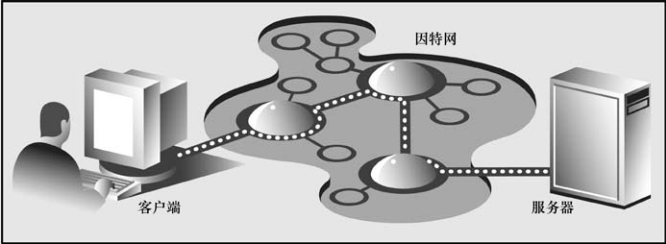

### 2.2.2 软件客户端/服务器架构
软件服务器也运行在一块硬件之上，但是没有像硬件服务器那样的专用外围设备（如打
印机、磁盘驱动器等）。软件服务器提供的主要服务包括程序执行、数据传输检索、聚合、更
新，或其他类型的编程或数据操作。

现在一个更常见的软件服务器就是 Web 服务器。如果个人或公司想要运行自己的 Web 服务
器，那么必须拥有一台或多台计算机，在上面安装希望提供给用户的 Web 页面和 Web 应用程序，
然后启动 Web 服务器。一个这样的服务器的工作就是接受客户端请求，并向（Web）客户端（即
用户计算机上的浏览器）回送 Web 页面，然后等待下一个客户端的请求。这些服务器一旦开启，
都将可能永远运行。虽然它们并不能实现这一目标，但是它们会尽可能长时间地运行，除非受到
一些外力驱使才会停止，如显式地关闭，或灾难性地关闭（由于硬件故障）。

数据库服务器是另一种类型的软件服务器。它们接受客户端的存储或检索请求，响应请
求，然后等待更多的事务。与 Web 服务器类似，它们也是永远运行的。

我们将讨论的最后一类软件服务器就是窗体（window）服务器，几乎可以认为这些服务
器是硬件服务器。它们运行在一台附带（外接）显示设备（如显示器）的计算机上。窗体客
户端其实就是一些程序，这些程序需要一个窗口化的环境来运行。这些通常被当作图形用户
界面（GUI）应用程序。如果在没有窗体服务器的情况下执行它们，也即意味着在一个基于
文本的环境中，如 DOS 窗口或一个 UNIX shell 中，那么将无法启动它们。一旦能够访问窗
体服务器，那么一切都会正常。

在网络领域，这种环境会变得更加有趣。窗体客户端通常的显示设备就是本地计算机上
的服务器，但是在一些网络化的窗体环境（如 X Window 系统）中，也可以选择另一台计算
机的窗体服务器作为一个显示设备。在这种情况下，你就可以在一台计算机上运行一个 GUI
程序，而将它显示在另一台计算机上！

### 2.2.4 客户端/服务器网络编程
在服务器响应客户端请求之前，必须进行一些初步的设置流程来为之后的工作做准备。
首先会创建一个通信端点，它能够使服务器监听请求。可以把服务器比作公司前台，或者应
答公司主线呼叫的总机接线员。一旦电话号码和设备安装成功且接线员到达时，服务就可以
开始了。

这个过程与网络世界一样，一旦一个通信端点已经建立，监听服务器就可以进入无限循
环中，等待客户端的连接并响应它们的请求。当然，为了使公司电话接待员一直处于忙碌状
态，我们绝不能忘记将电话号码放在公司信笺、广告或一些新闻稿上；否则，将没有人会打
电话过来!

相似地，必须让潜在的客户知道存在这样的服务器来处理他们的需求；否则，服务器将
永远不会得到任何请求。想象着创建一个全新的网站，这可能是最了不起的、劲爆的、令人
惊异的、有用的并且最酷的网站，但如果该网站的 Web 地址或 URL 从来没有以任何方式广
播或进行广告宣传，那么永远也不会有人知道它，并且也将永远不会看到任何访问者。

现在你已经非常了解了服务器是如何工作的，这就已经解决了较困难的部分。客户端比
服务器端更简单，客户端所需要做的只是创建它的单一通信端点，然后建立一个到服务器的
连接。然后，客户端就可以发出请求，该请求包括任何必要的数据交换。一旦请求被服务器
处理，且客户端收到结果或某种确认信息，此次通信就会被终止

## 2.3 套接字：通信端点
本节将介绍套接字（socket），给出有关其起源的一些背景知识，并讨论各种类型的套接字。
最后，将讲述如何利用它们使运行在不同（或相同）计算机上的进程相互通信。

### 2.3.1 套接字
套接字是计算机网络数据结构，它体现了上节中所描述的“通信端点”的概念。在任何
类型的通信开始之前，网络应用程序必须创建套接字。可以将它们比作电话插孔，没有它将
无法进行通信。

套接字的起源可以追溯到 20 世纪 70 年代，它是加利福尼亚大学的伯克利版本 UNIX（称
为 BSD UNIX）的一部分。因此，有时你可能会听过将套接字称为伯克利套接字或 BSD 套接
字。套接字最初是为同一主机上的应用程序所创建，使得主机上运行的一个程序（又名一个
进程）与另一个运行的程序进行通信。这就是所谓的进程间通信（Inter Process Communication，
IPC）。有两种类型的套接字：基于文件的和面向网络的。

UNIX 套接字是我们所讲的套接字的第一个家族，并且拥有一个“家族名字” AF_UNIX
（又名 AF_LOCAL，在 POSIX1.g 标准中指定），它代表地址家族（address family）： UNIX。
包括 Python 在内的大多数受欢迎的平台都使用术语地址家族及其缩写 AF；其他比较旧的系
统可能会将地址家族表示成域（domain）或协议家族（protocol family），并使用其缩写 PF 而
非 AF。类似地， AF_LOCAL（在 2000～2001 年标准化）将代替 AF_UNIX。然而，考虑到
后向兼容性，很多系统都同时使用二者，只是对同一个常数使用不同的别名。 Python 本身仍
然在使用 AF_UNIX。 

因为两个进程运行在同一台计算机上，所以这些套接字都是基于文件的，这意味着文件
系统支持它们的底层基础结构。这是能够说得通的，因为文件系统是一个运行在同一主机上
的多个进程之间的共享常量。

第二种类型的套接字是基于网络的，它也有自己的家族名字 AF_INET，或者地址家族：
因特网。另一个地址家族 AF_INET6 用于第 6 版因特网协议（IPv6）寻址。此外，还有其他
的地址家族，这些要么是专业的、过时的、很少使用的，要么是仍未实现的。在所有的地址
家族之中，目前 AF_INET 是使用得最广泛的。

Python 2.5 中引入了对特殊类型的 Linux 套接字的支持。套接字的 AF_NETLINK 家族（无
连接[见 2.3.3 节]）允许使用标准的 BSD 套接字接口进行用户级别和内核级别代码之间的 IPC。
之前那种解决方案比较麻烦，而这个解决方案可以看作一种比前一种更加优雅且风险更低的
解决方案，例如，添加新系统调用、 /proc 支持，或者对一个操作系统的“IOCTL”。
针对 Linux 的另一种特性（Python 2.6 中新增）就是支持透明的进程间通信（TIPC）协
议。 TIPC 允许计算机集群之中的机器相互通信，而无须使用基于 IP 的寻址方式。 Python 对
TIPC 的支持以 AF_TIPC 家族的方式呈现。

总的来说， Python 只支持 AF_UNIX、 AF_NETLINK、 AF_TIPC 和 AF_INET 家族。因为
本章重点讨论网络编程，所以在本章剩余的大部分内容中，我们将使用 AF_INET。

### 2.3.2 套接字地址：主机-端口对
如果一个套接字像一个电话插孔——允许通信的一些基础设施，那么主机名和端口号就
像区号和电话号码的组合。然而，拥有硬件和通信的能力本身并没有任何好处，除非你知道
电话打给谁以及如何拨打电话。一个网络地址由主机名和端口号对组成，而这是网络通信所
需要的。此外，并未事先说明必须有其他人在另一端接听；否则，你将听到这个熟悉的声音
“对不起，您所拨打的电话是空号，请核对后再拨”。你可能已经在浏览网页的过程中见过一
个网络类比，例如“无法连接服务器，服务器没有响应或者服务器不可达。”

有效的端口号范围为 0～65535（尽管小于 1024 的端口号预留给了系统）。如果你正在使
用 POSIX 兼容系统（如 Linux、 Mac OS X 等），那么可以在/etc/services 文件中找到预留端口
号的列表（以及服务器／协议和套接字类型）。众所周知的端口号列表可以在这个网站中查看：
http://www.iana.org/assignments/port-numbers。